In [28]:
from pamplona_weather import get_pamplona_weather_history
from datetime import datetime

years = list(range(2012, 2016+1))
num_rainy_days = []
num_total_days = []

for year in years:
    days_in_history = set()
    weather_history = get_pamplona_weather_history(
        start = datetime(day = 1, month = 1, year = year),
        end = datetime(day = 31, month = 12, year = year))
    
    rain_history = [weather for weather in weather_history if
                    weather.get_rain_volume() > 0]
    
    rainy_days = set([weather.get_timestamp().date()
                      for weather in rain_history])
    
    num_rainy_days.append(len(rainy_days))
    num_total_days.append(365 if (year % 4) > 0 else 366)

rainy_days_percentage = [(rainy_days_on_year / num_days_on_year) * 100
                         for rainy_days_on_year, num_days_on_year in
                         zip(num_rainy_days, num_total_days)]

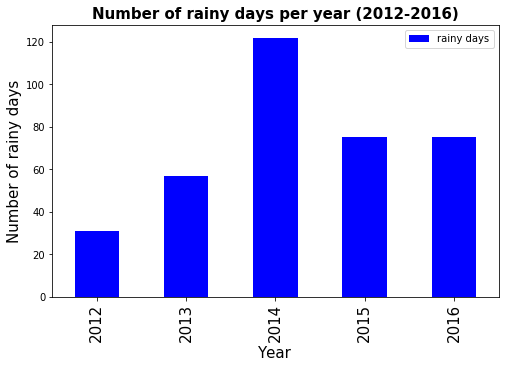

In [33]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


frame = pd.DataFrame()
frame['rainy days'] = num_rainy_days

fig, ax = plt.subplots(figsize = (8, 5))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of rainy days' , fontsize=15)
ax.set_title('Number of rainy days per year (2012-2016)', fontsize=15, fontweight='bold')
plot = frame.plot.bar(ax = ax, color = 'blue')
plot.xaxis.set_major_formatter(ticker.FixedFormatter(years))